In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
#importing the file for covid 19 India
covid_df = pd.read_csv("covid_19_india.csv")
covid_df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [3]:
#Viewing the first 10 rows
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [4]:
#info function to view the details of the file
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [5]:
#Using describe function to get a glimpse of count, mean, min, max etc.
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [6]:
#importing Vaccine statewise file
vaccine_df = pd.read_csv("covid_vaccine_statewise.csv")
#viewing the first 10 rows
vaccine_df.head(10)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [7]:
#Using describe function to get a glimpse of count, mean, min, max etc.
vaccine_df.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


In [8]:
#info function to view the details of the file
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [9]:
#Dropping columns
covid_df.drop(["Sno", "Time","ConfirmedIndianNational","ConfirmedForeignNational",], inplace = True, axis = 1)

In [10]:
covid_df.head(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


In [11]:
#changing format of date column
covid_df['Date']= pd.to_datetime(covid_df['Date'], format = '%Y-%m-%d')

In [12]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [13]:
#finding total number of active cases which is confirmed - (cured + death)
covid_df['Active'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])
covid_df.tail(5)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [14]:
#Create a Pivot Table
statewise = pd.pivot_table(covid_df, values = ["Confirmed", "Deaths", "Cured"], index ="State/UnionTerritory", aggfunc= max)

In [15]:
#Recovery Rate = total no of cured / total no of confirmed *100
statewise["Recovery Rate"] = statewise["Cured"]*100/statewise["Confirmed"]

In [16]:
#Mortality Rate = total no of death/total no of confirmed *100
statewise["Mortality Rate"] = statewise["Deaths"]*100/statewise["Confirmed"]


In [17]:
#sorting by confirmed cases column in descending order
statewise = statewise.sort_values(by="Confirmed", ascending = False)

In [18]:
#plotting pivot table using background_gradient function with cmap(color maps in matplotlib) 
statewise.style.background_gradient(cmap = "cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


In [19]:
#top 10 sates based on active cases.
top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active', 'Date']].sort_values(by = ['Active'], ascending = False). reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

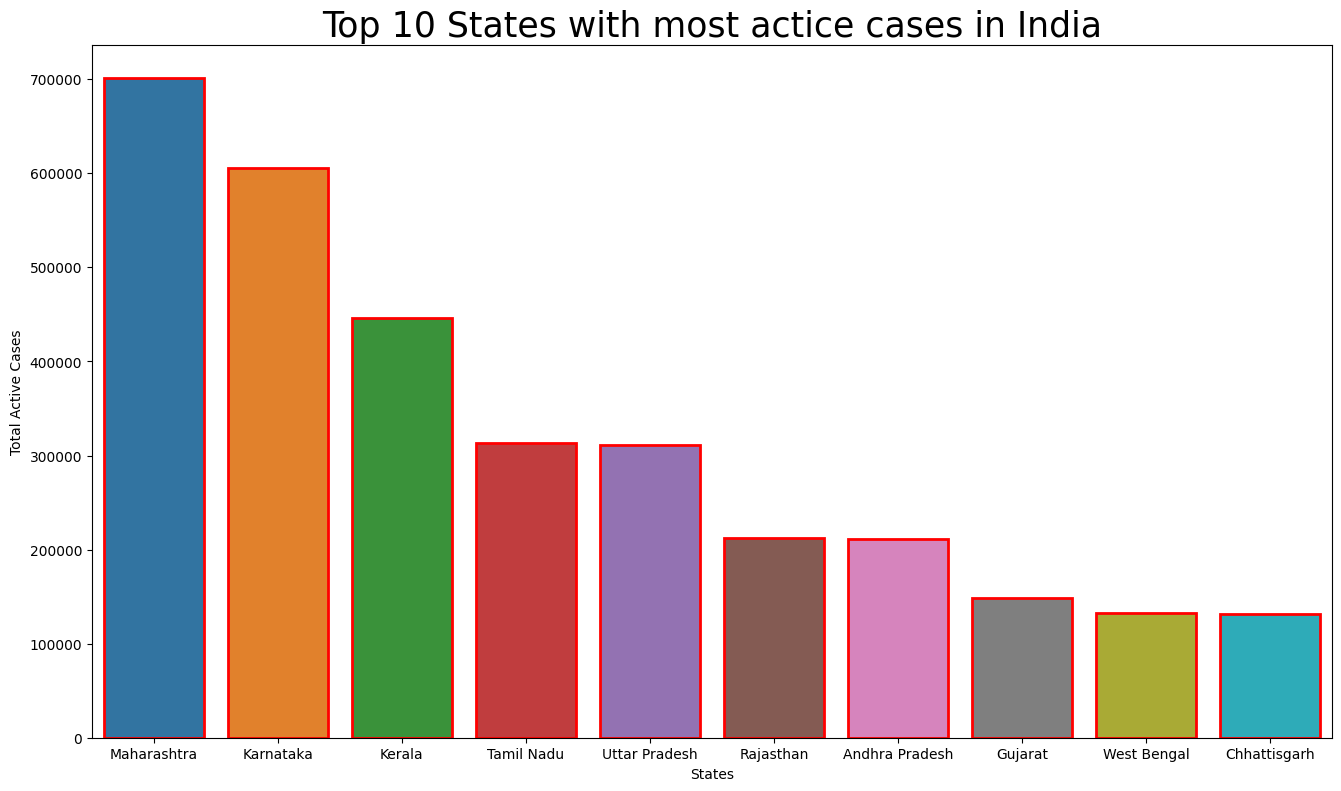

In [20]:
fig = plt.figure(figsize=(16,9)) #figure size
plt.title("Top 10 States with most actice cases in India", size = 25) #giving title
ax = sns.barplot(data = top_10_active_cases.iloc[:10], y= "Active", x = "State/UnionTerritory", 
                 linewidth = 2, edgecolor = 'red')
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show

#barplot using seaborn and using iloc function (index location) to take first 10 states

In [21]:
#Top 10 states with highest deaths

top_10_deaths = covid_df.groupby(by = 'State/UnionTerritory').max()[['Deaths','Date']].sort_values(by = ['Deaths'], ascending = False).reset_index()


<function matplotlib.pyplot.show(close=None, block=None)>

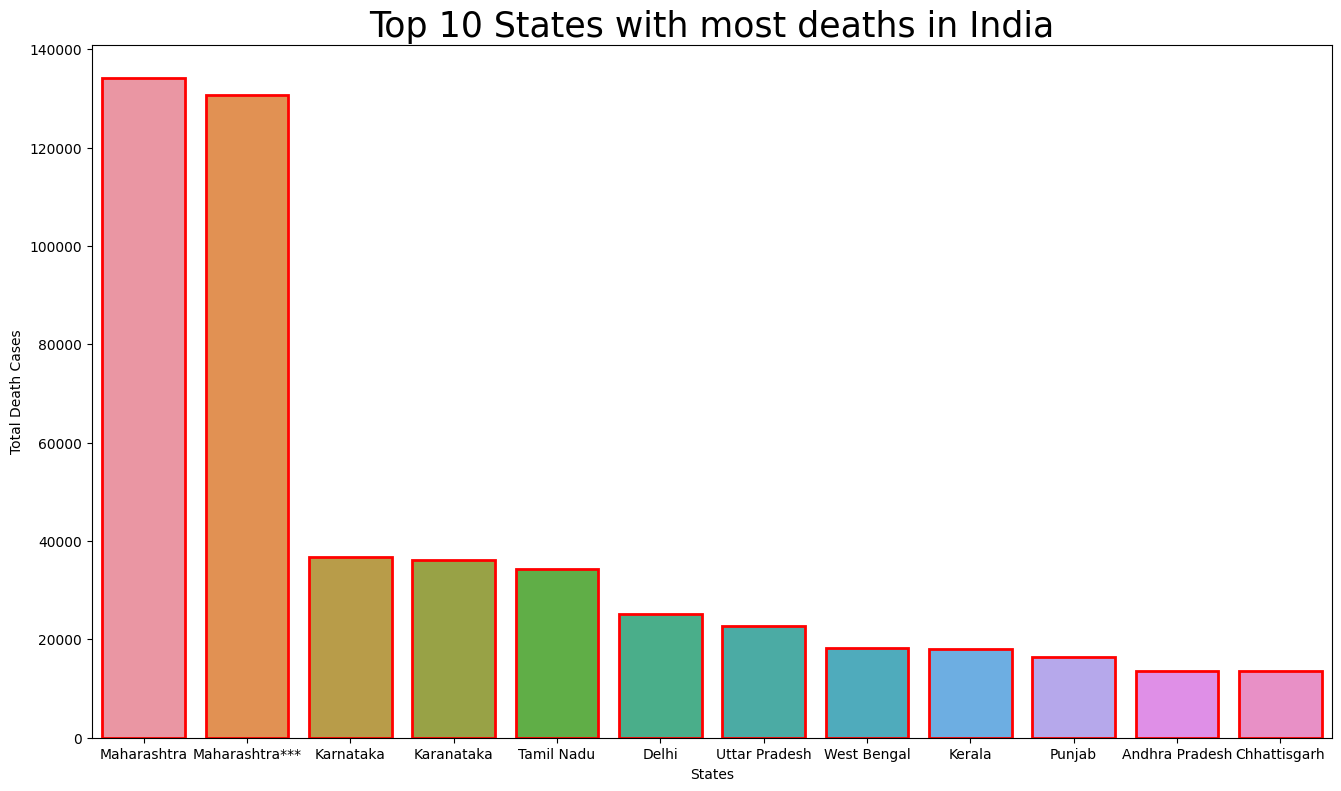

In [22]:
fig = plt.figure(figsize=(16,9)) #figure size
plt.title("Top 10 States with most deaths in India", size = 25) #giving title
ax = sns.barplot(data = top_10_deaths.iloc[:12], y= "Deaths", x = "State/UnionTerritory",linewidth = 2, edgecolor = 'red')
plt.xlabel("States") #giving x axis name
plt.ylabel("Total Death Cases") #giving y axis name
plt.show
#barplot using seaborn and using iloc function (index location) to take first 10 states

Text(0.5, 1.0, 'Top 5 Affected States in India')

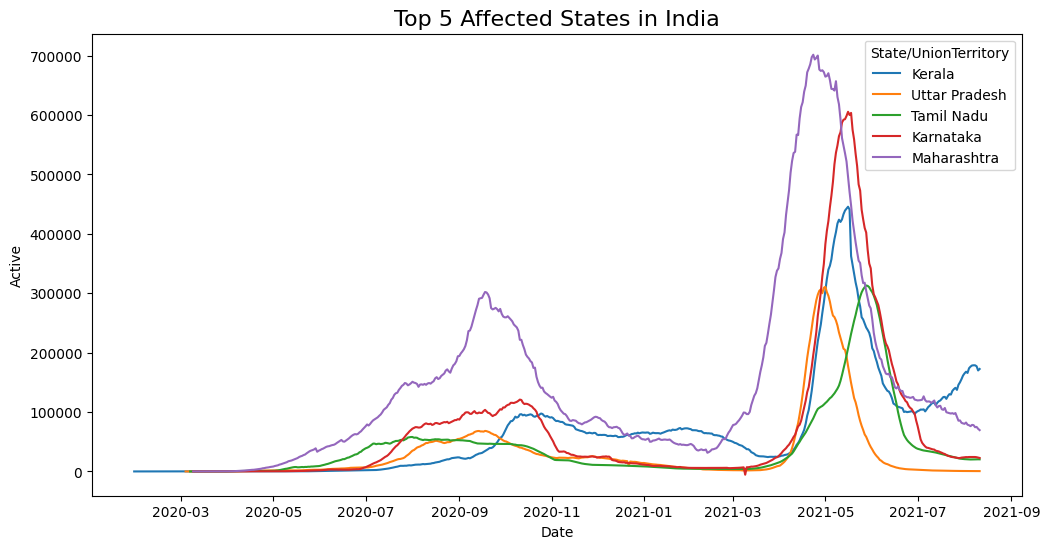

In [23]:
#creating line plot for the growth or trend for active case for top 5 state
fig = plt.figure(figsize = (12,6))

ax = sns.lineplot(data = covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Kerala','Tamil Nadu', 'Uttar Pradesh'])],x= 'Date', y ='Active', hue= 'State/UnionTerritory')
ax.set_title("Top 5 Affected States in India", size=16)


In [24]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [25]:
#renaming column

vaccine_df.rename(columns={'Updated on' : 'Vaccine_Date'}, inplace=True)
vaccine_df.head(10)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [26]:
#sum of all missing values

vaccine_df.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [27]:
#dropping few missing value columns

vaccination = vaccine_df.drop(columns=['Sputnik V (Doses Administered)', 'AEFI','18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'], axis = 1)

In [28]:
vaccination.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [29]:
#create pyplot to see vaccination for male and female using plotly

male = vaccination['Male(Individuals Vaccinated)'].sum()
female = vaccination['Female(Individuals Vaccinated)'].sum()
px.pie(names=["Male", "Female"], values = [male, female],title = 'Male and Female Vaccination')

In [30]:
#droping rows with india as state

vaccine = vaccine_df[vaccine_df.State!='India']
vaccine

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#renaming last column
vaccine.rename(columns= {'Total Individuals Vaccinated': 'Total'}, inplace=True)
vaccine.head()

C:\Users\belgi\AppData\Local\Temp\ipykernel_17908\3097783258.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [32]:
#find states with most vaccinated individuals

max_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vac= max_vac.sort_values('Total', ascending=False)[:5]
max_vac



,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


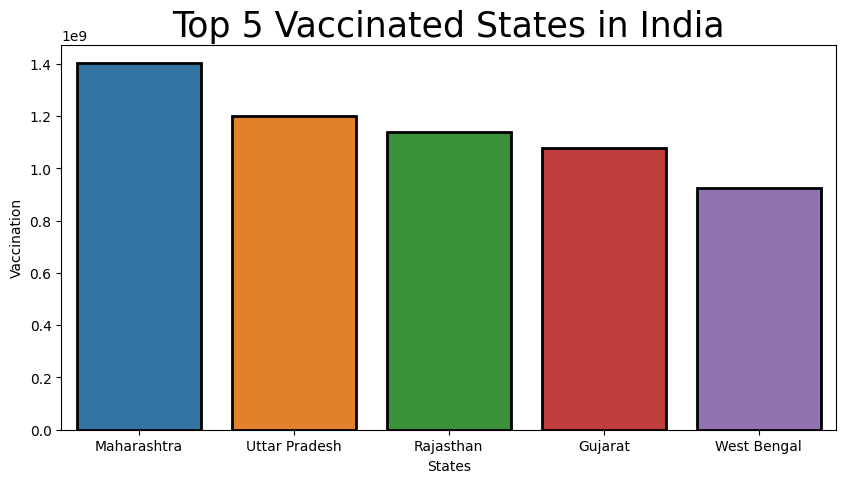

In [33]:
#converting table to chart

fig = plt.figure(figsize=(10,5)) #figure size
plt.title("Top 5 Vaccinated States in India", size = 25) #giving title
ax = sns.barplot(data = max_vac.iloc[:10], y= max_vac.Total, x = max_vac.index, 
                 linewidth = 2, edgecolor = 'black')
plt.xlabel("States")
plt.ylabel("Vaccination")
plt.show()


In [34]:
#find states with least vaccinated individuals

min_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
min_vac= min_vac.sort_values('Total', ascending=True)[:5]
min_vac

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


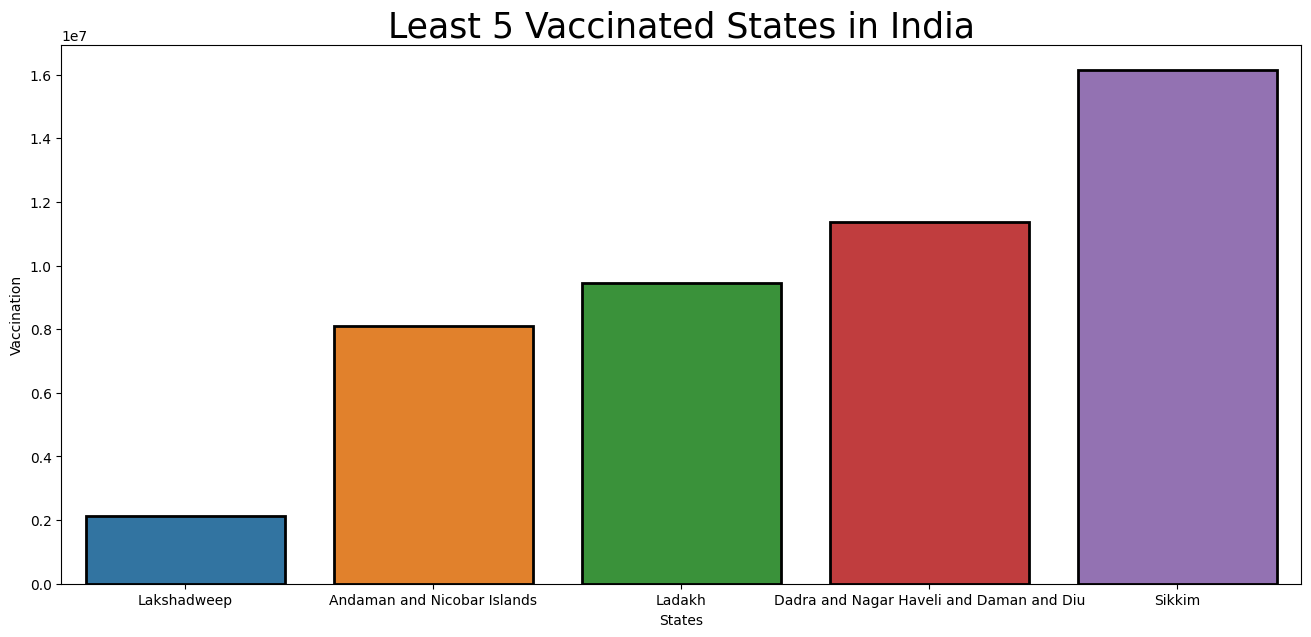

In [35]:
#converting table to chart

fig = plt.figure(figsize=(16,7)) #figure size
plt.title("Least 5 Vaccinated States in India", size = 25) #giving title
ax = sns.barplot(data = min_vac.iloc[:10], y= min_vac.Total, x = min_vac.index, 
                 linewidth = 2, edgecolor = 'black')
plt.xlabel("States")
plt.ylabel("Vaccination")
plt.show()
